In [1]:
import arviz
import matplotlib.pyplot as plt
import pandas as pd
from utils.model_builder import ModelBuilder
from utils.posteriorplots import predictive_plot, retrodictive_plot

In [2]:
arviz.style.use("arviz-darkgrid")
arviz.rcParams["plot.max_subplots"] = 50

In [3]:
%load_ext autoreload
%autoreload 2

## Model with socio-eco predictors

In [4]:
election_date = "2022-04-10"
mb = ModelBuilder(
    election_to_predict=election_date,
    test_cutoff=None,
    variance_weight=[0.1, 0.4, 0.5],
    lengthscale=[5, 14, 28],
)

/Users/alex_andorra/opt/anaconda3/envs/elections-models/lib/python3.9/site-packages/pandas/core/algorithms.py:431: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  uniques = table.unique(values)
/Users/alex_andorra/opt/anaconda3/envs/elections-models/lib/python3.9/site-packages/pandas/core/indexes/base.py:2023: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_unique
/Users/alex_andorra/opt/anaconda3/envs/elections-models/lib/python3.9/site-packages/pandas/core/indexes/base.py:3512: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the 

In [5]:
hierarchical_dm = mb.build_model()

In [6]:
idata_hierarchical_dm = mb.sample_all(
    var_names=[
        "latent_popularity",
        "latent_pop_t0",
        "R",
        "noisy_popularity",
        "N_approve",
    ],
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [concentration, election_party_time_coefs, party_time_coefs_raw, lsd_election_party_raw, lsd_election_party_sd, lsd_election_effect, lsd_party_effect_election_party_amplitude, lsd_party_effect_party_amplitude, lsd_intercept, unemployment_effect, house_election_effects_raw, house_election_effects_sd, house_effects, poll_bias, election_party_intercept, election_party_intercept_sd, party_intercept, party_intercept_sd]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1366 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [8]:
polls_train = mb.polls_train.copy()
election_forecast = mb.forecast_election(idata_hierarchical_dm)
results = mb.results_raw.copy()
polls_test = mb.polls_test.copy()

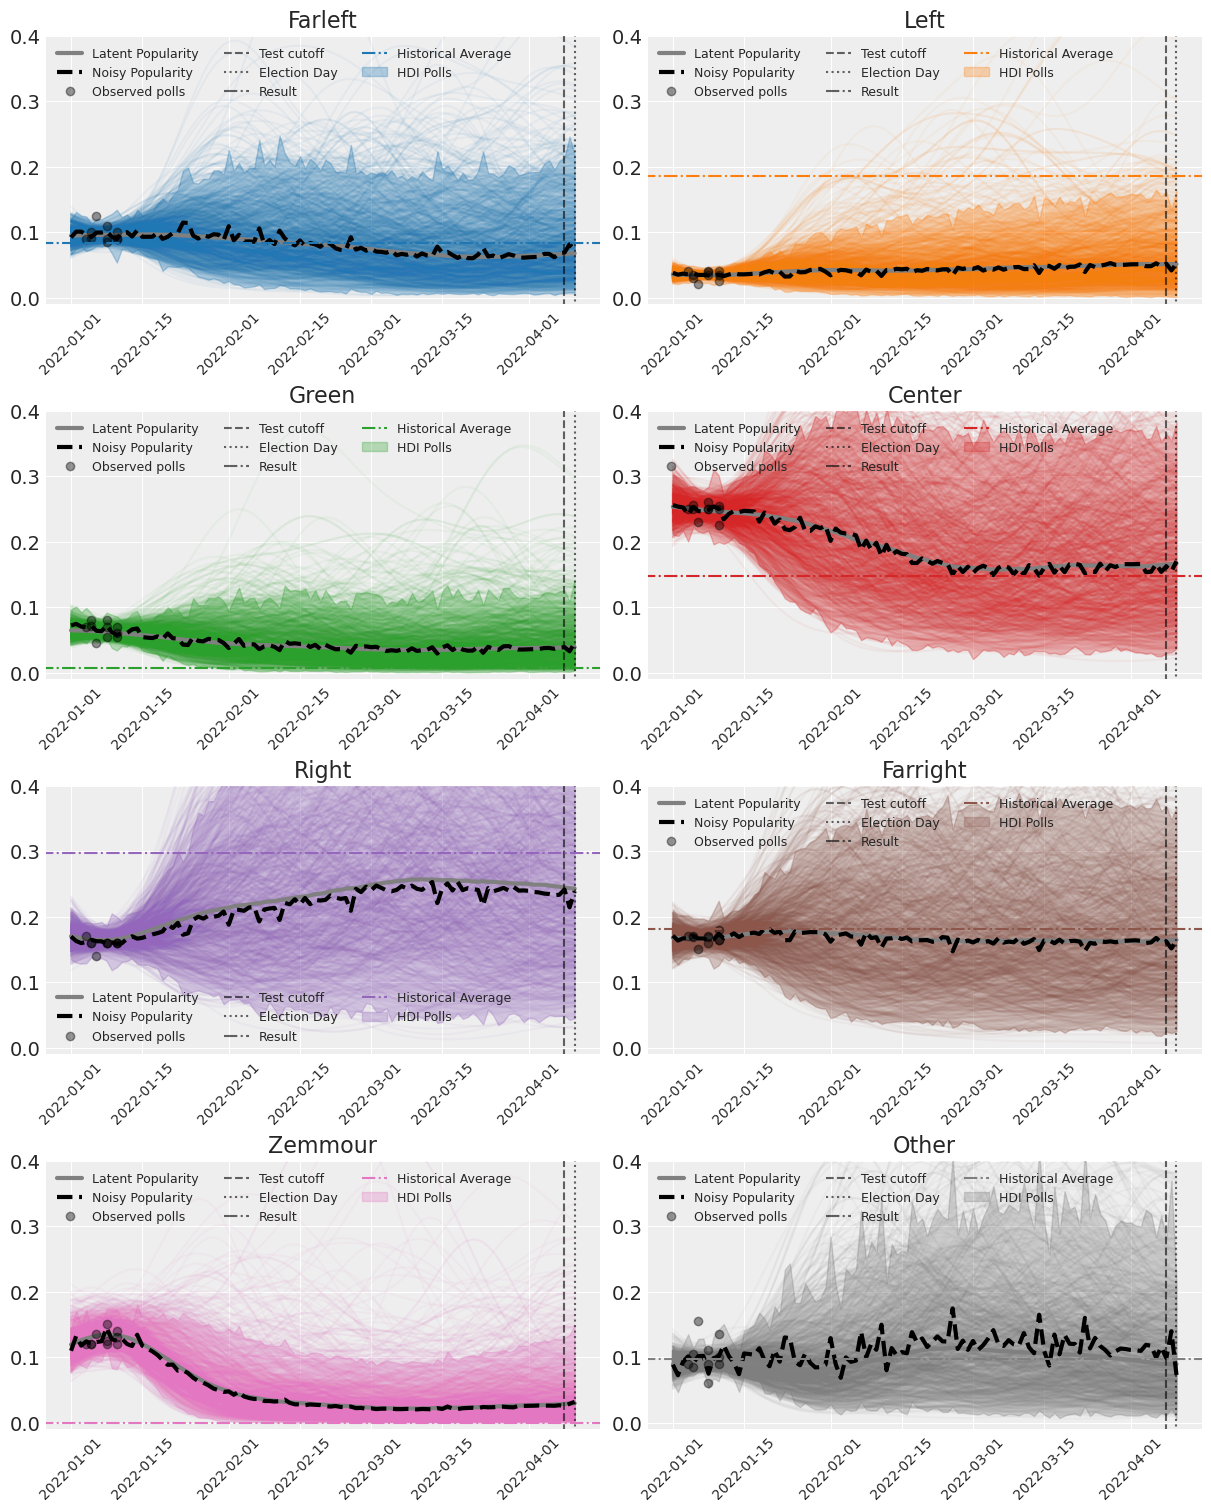

In [9]:
predictive_plot(
    election_forecast,
    mb.parties_complete,
    election_date,
    results[results.dateelection == election_date],
    polls_train[polls_train.dateelection == election_date],
    polls_test[polls_test.dateelection == election_date],
    None,
)

In [10]:
summary = arviz.summary(idata_hierarchical_dm, round_to=2)
low_ess = summary[(summary.ess_bulk <= 1000) | (summary.ess_tail <= 1000)]

In [11]:
summary[(summary.ess_bulk <= 400) | (summary.ess_tail <= 400)]

Empty DataFrame
Columns: [mean, sd, hdi_3%, hdi_97%, mcse_mean, mcse_sd, ess_bulk, ess_tail, r_hat]
Index: []

In [12]:
low_ess[
    (~low_ess.index.str.startswith("noisy"))
    & (~low_ess.index.str.startswith("latent"))
    & (~low_ess.index.str.startswith("election_party_time_effect"))
]

mean    sd  hdi_3%  \
party_intercept[farleft]                            0.78  0.12    0.56   
party_intercept[left]                               1.57  0.11    1.38   
party_intercept[right]                              2.05  0.11    1.85   
party_intercept[farright]                           1.54  0.10    1.36   
election_party_intercept_sd[right]                  0.69  0.22    0.29   
...                                                  ...   ...     ...   
election_party_time_coefs[5, right, 2002-04-21T...  0.36  0.21   -0.03   
election_party_time_coefs[5, right, 2012-04-22T... -0.24  0.20   -0.61   
election_party_time_coefs[5, right, 2022-04-10T... -0.84  0.69   -2.26   
election_party_time_coefs[5, farright, 2022-04-... -0.27  0.59   -1.41   
election_party_time_coefs[5, other, 2022-04-10T... -0.87  0.72   -2.18   

                                                    hdi_97%  mcse_mean  \
party_intercept[farleft]                               1.00       0.00   
party_intercept[left]                                  1.79       0.00   
party_intercept[right]                                 2.26       0.00   
party_intercept[farright]                              1.74       0.00   
election_party_intercept_sd[right]                     1.11       0.01   
...                                                     ...        ...   
election_party_time_coefs[5, right, 2002-04-21T...     0.76       0.01   
election_party_time_coefs[5, right, 2012-04-22T...     0.16       0.01   
election_party_time_coefs[5, right, 2022-04-10T...     0.38       0.03   
election_party_time_coefs[5, farright, 2022-04-...     0.82       0.02   
election_party_time_coefs[5, other, 2022-04-10T...     0.52       0.03   

                                                    mcse_sd  ess_bulk  \
party_intercept[farleft]                               0.00    860.42   
party_intercept[left]                                  0.00    699.24   
party_intercept[right]                                 0.00    702.65   
party_intercept[farright]                              0.00    921.80   
election_party_intercept_sd[right]                     0.00    964.58   
...                                                     ...       ...   
election_party_time_coefs[5, right, 2002-04-21T...     0.01    910.43   
election_party_time_coefs[5, right, 2012-04-22T...     0.01    852.00   
election_party_time_coefs[5, right, 2022-04-10T...     0.02    679.42   
election_party_time_coefs[5, farright, 2022-04-...     0.02    759.02   
election_party_time_coefs[5, other, 2022-04-10T...     0.02    820.10   

                                                    ess_tail  r_hat  
party_intercept[farleft]                             1389.93   1.00  
party_intercept[left]                                1182.54   1.00  
party_intercept[right]                                970.69   1.00  
party_intercept[farright]                            1358.79   1.00  
election_party_intercept_sd[right]                    905.86   1.00  
...                                                      ...    ...  
election_party_time_coefs[5, right, 2002-04-21T...   1251.37   1.00  
election_party_time_coefs[5, right, 2012-04-22T...   1173.09   1.01  
election_party_time_coefs[5, right, 2022-04-10T...    832.02   1.01  
election_party_time_coefs[5, farright, 2022-04-...   1325.37   1.01  
election_party_time_coefs[5, other, 2022-04-10T...   1543.20   1.00  

[532 rows x 9 columns]

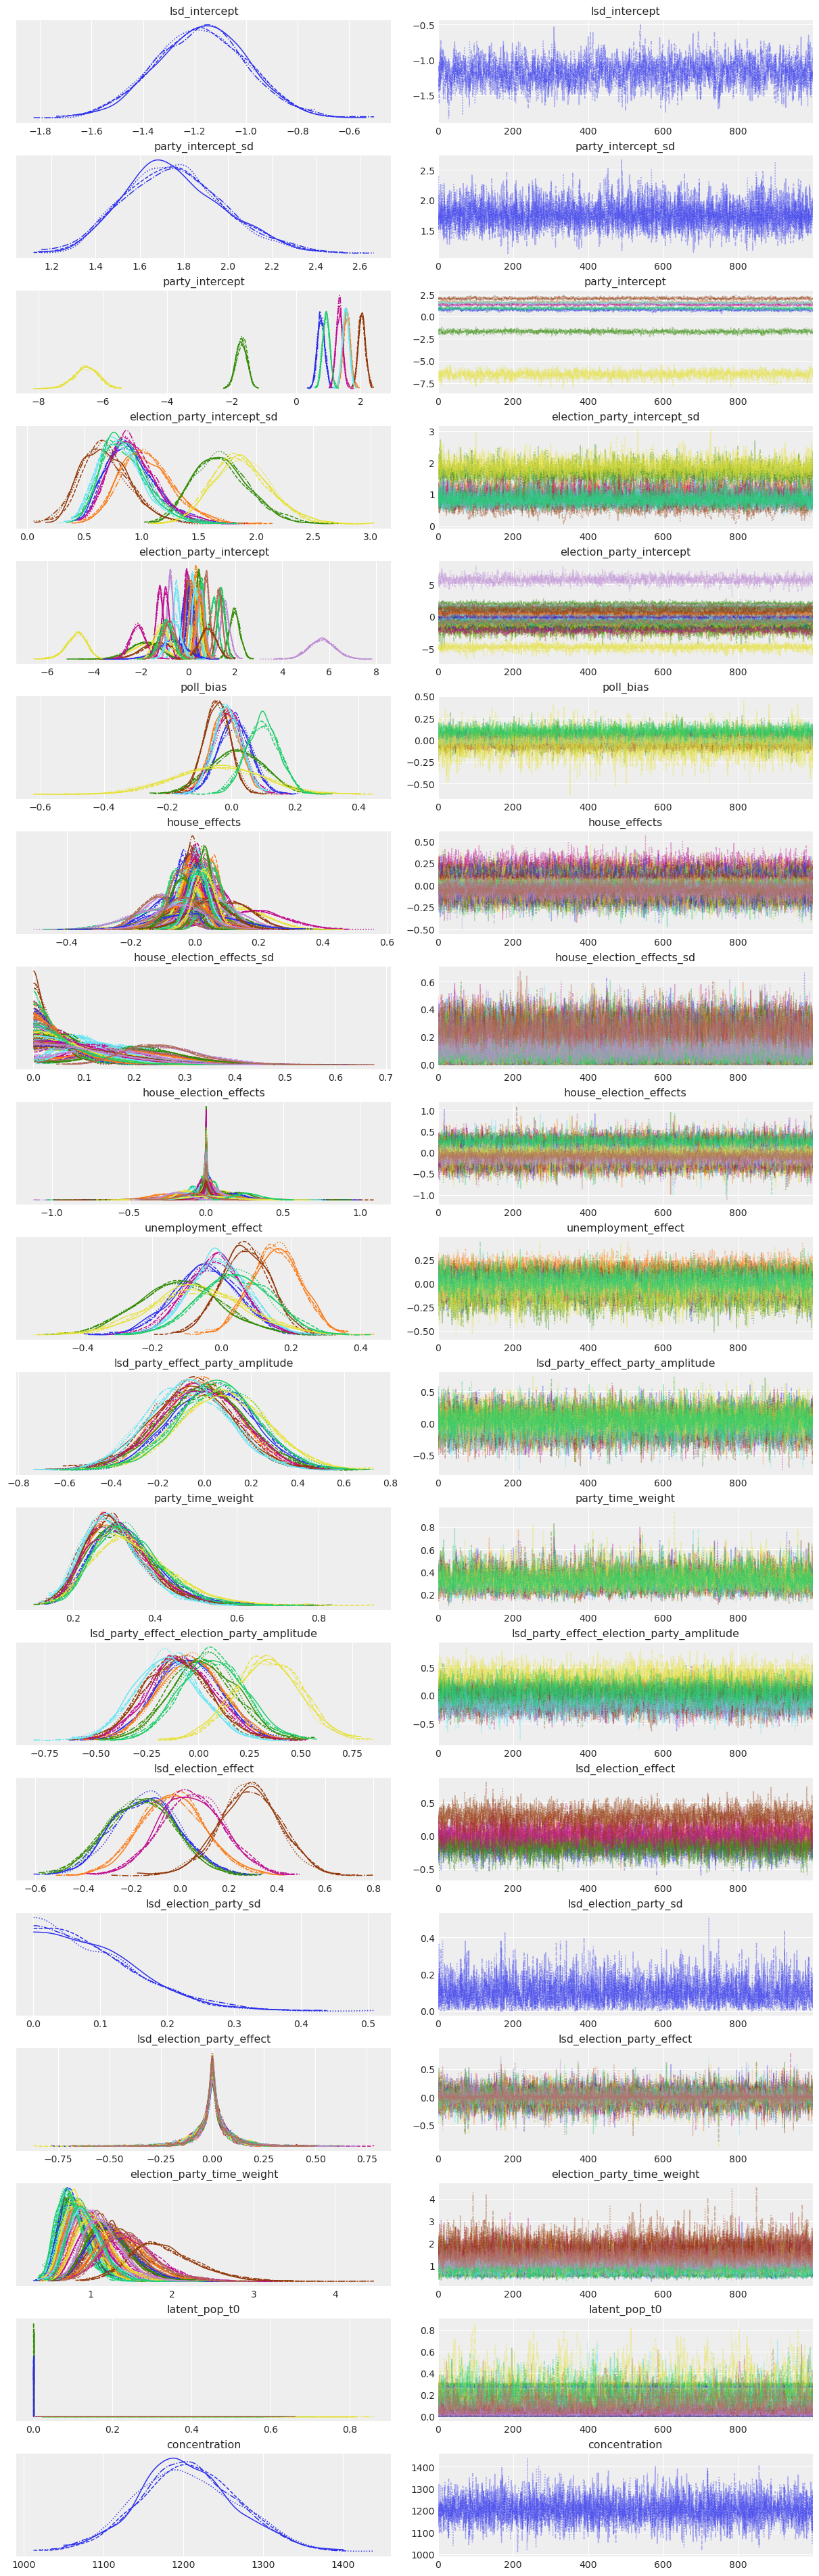

In [13]:
arviz.plot_trace(
    idata_hierarchical_dm,
    var_names=[
        "~time_effect",
        "~time_coefs",
        "~latent_popularity",
        "~noisy_popularity",
        "~raw",
    ],
    filter_vars="regex",
);

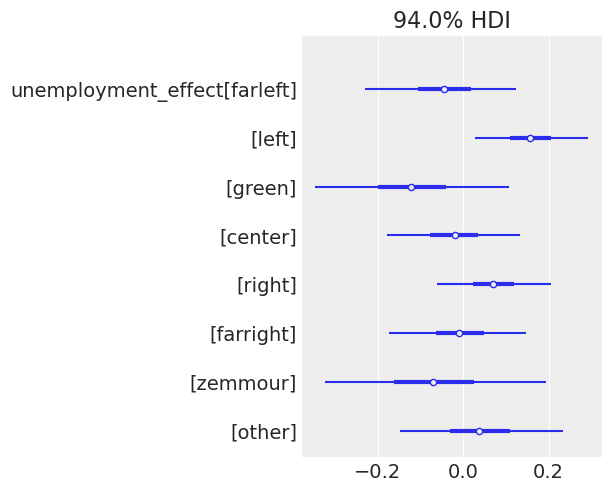

In [14]:
arviz.plot_forest(election_forecast, var_names="unemployment_effect", combined=True);

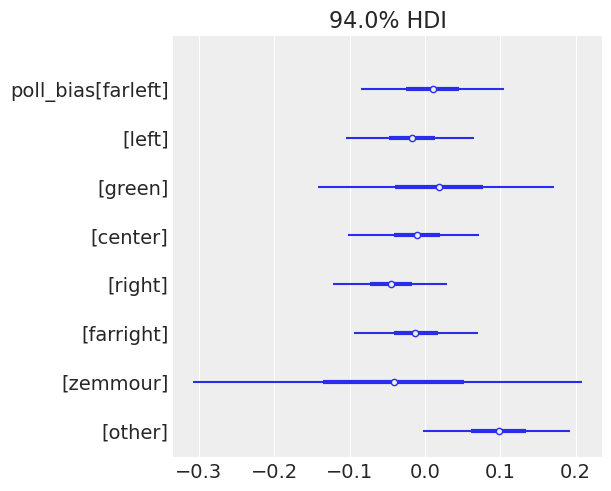

In [15]:
arviz.plot_forest(election_forecast, var_names="poll_bias", combined=True);

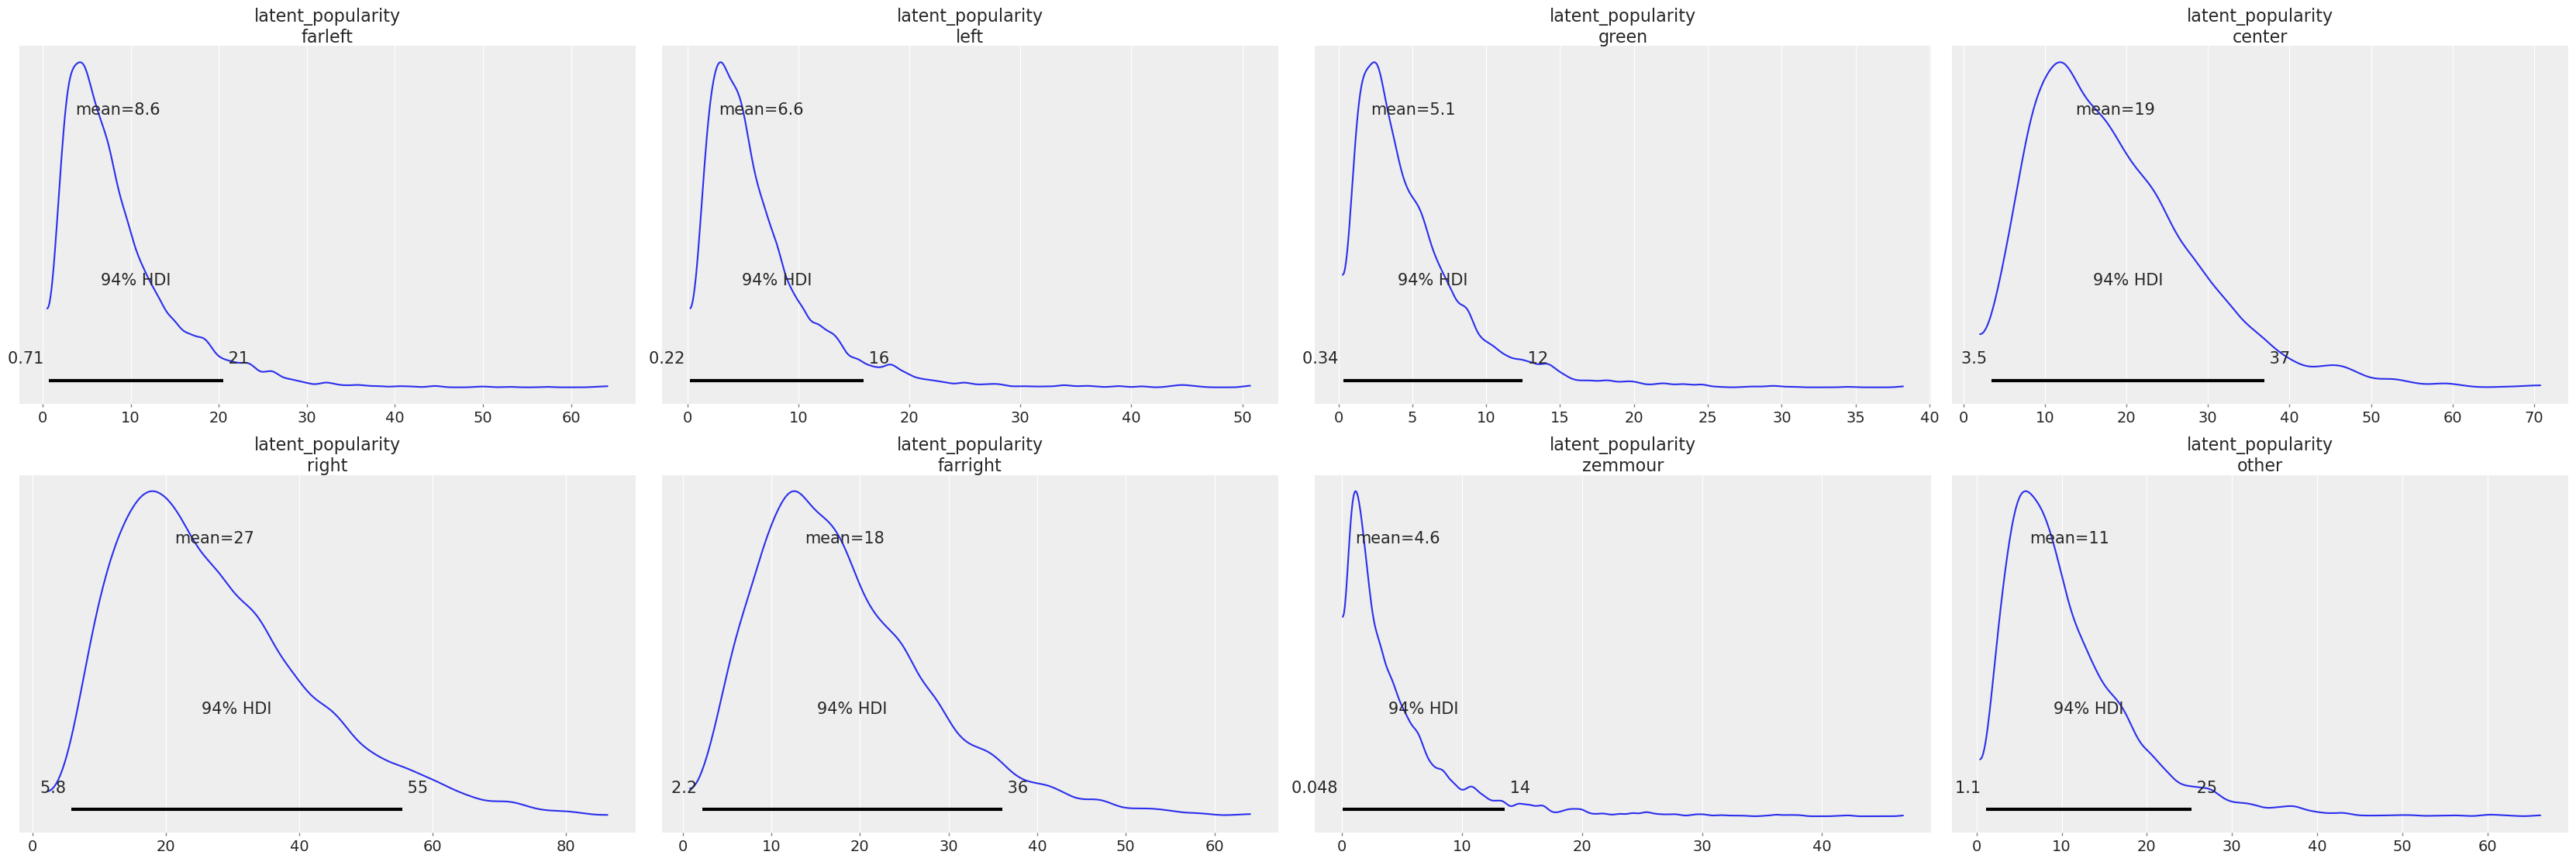

In [20]:
arviz.plot_posterior(
    election_forecast.predictions["latent_popularity"].sel(observations="2022-04-10")
    * 100,
);

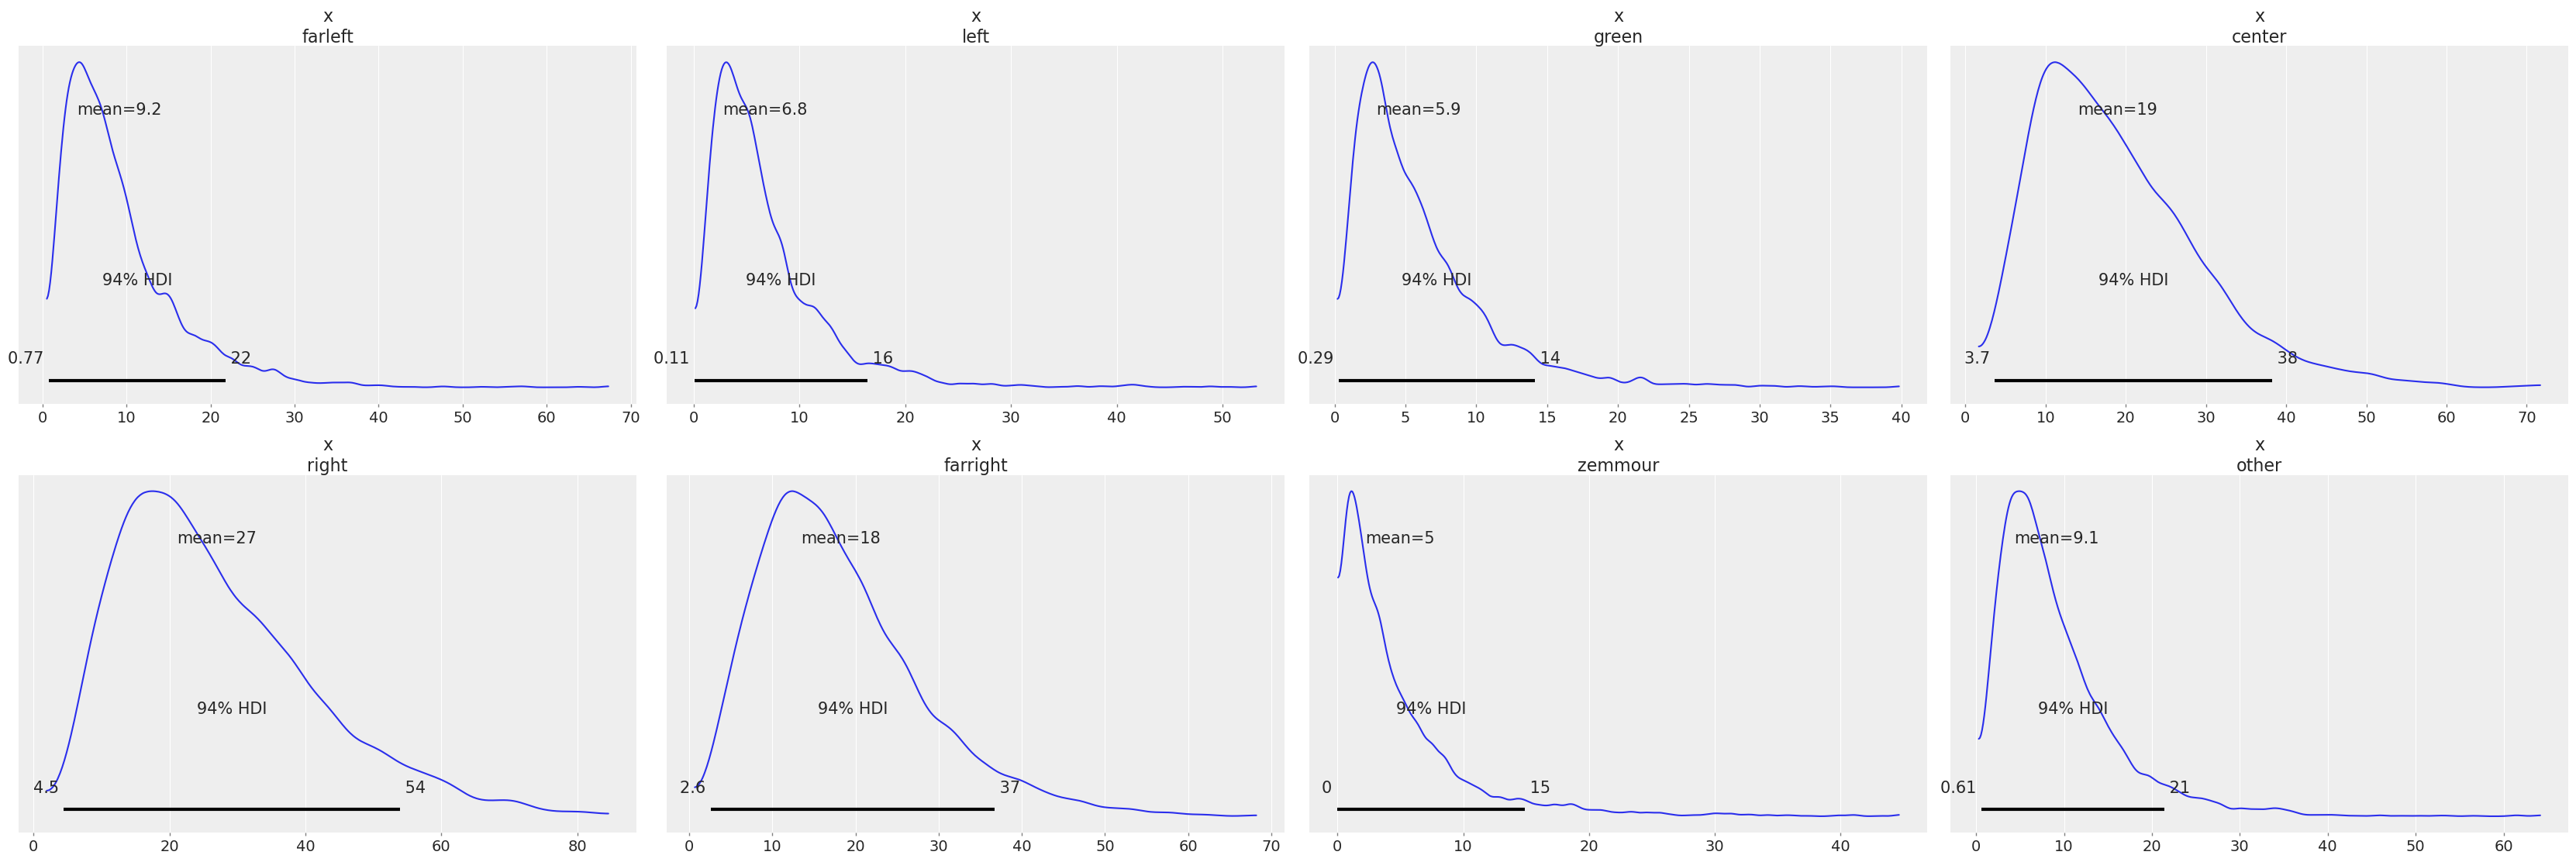

In [21]:
arviz.plot_posterior(
    (
        election_forecast.predictions["N_approve"]
        / election_forecast.predictions_constant_data["observed_N"]
    ).sel(observations="2022-04-10")
    * 100,
);

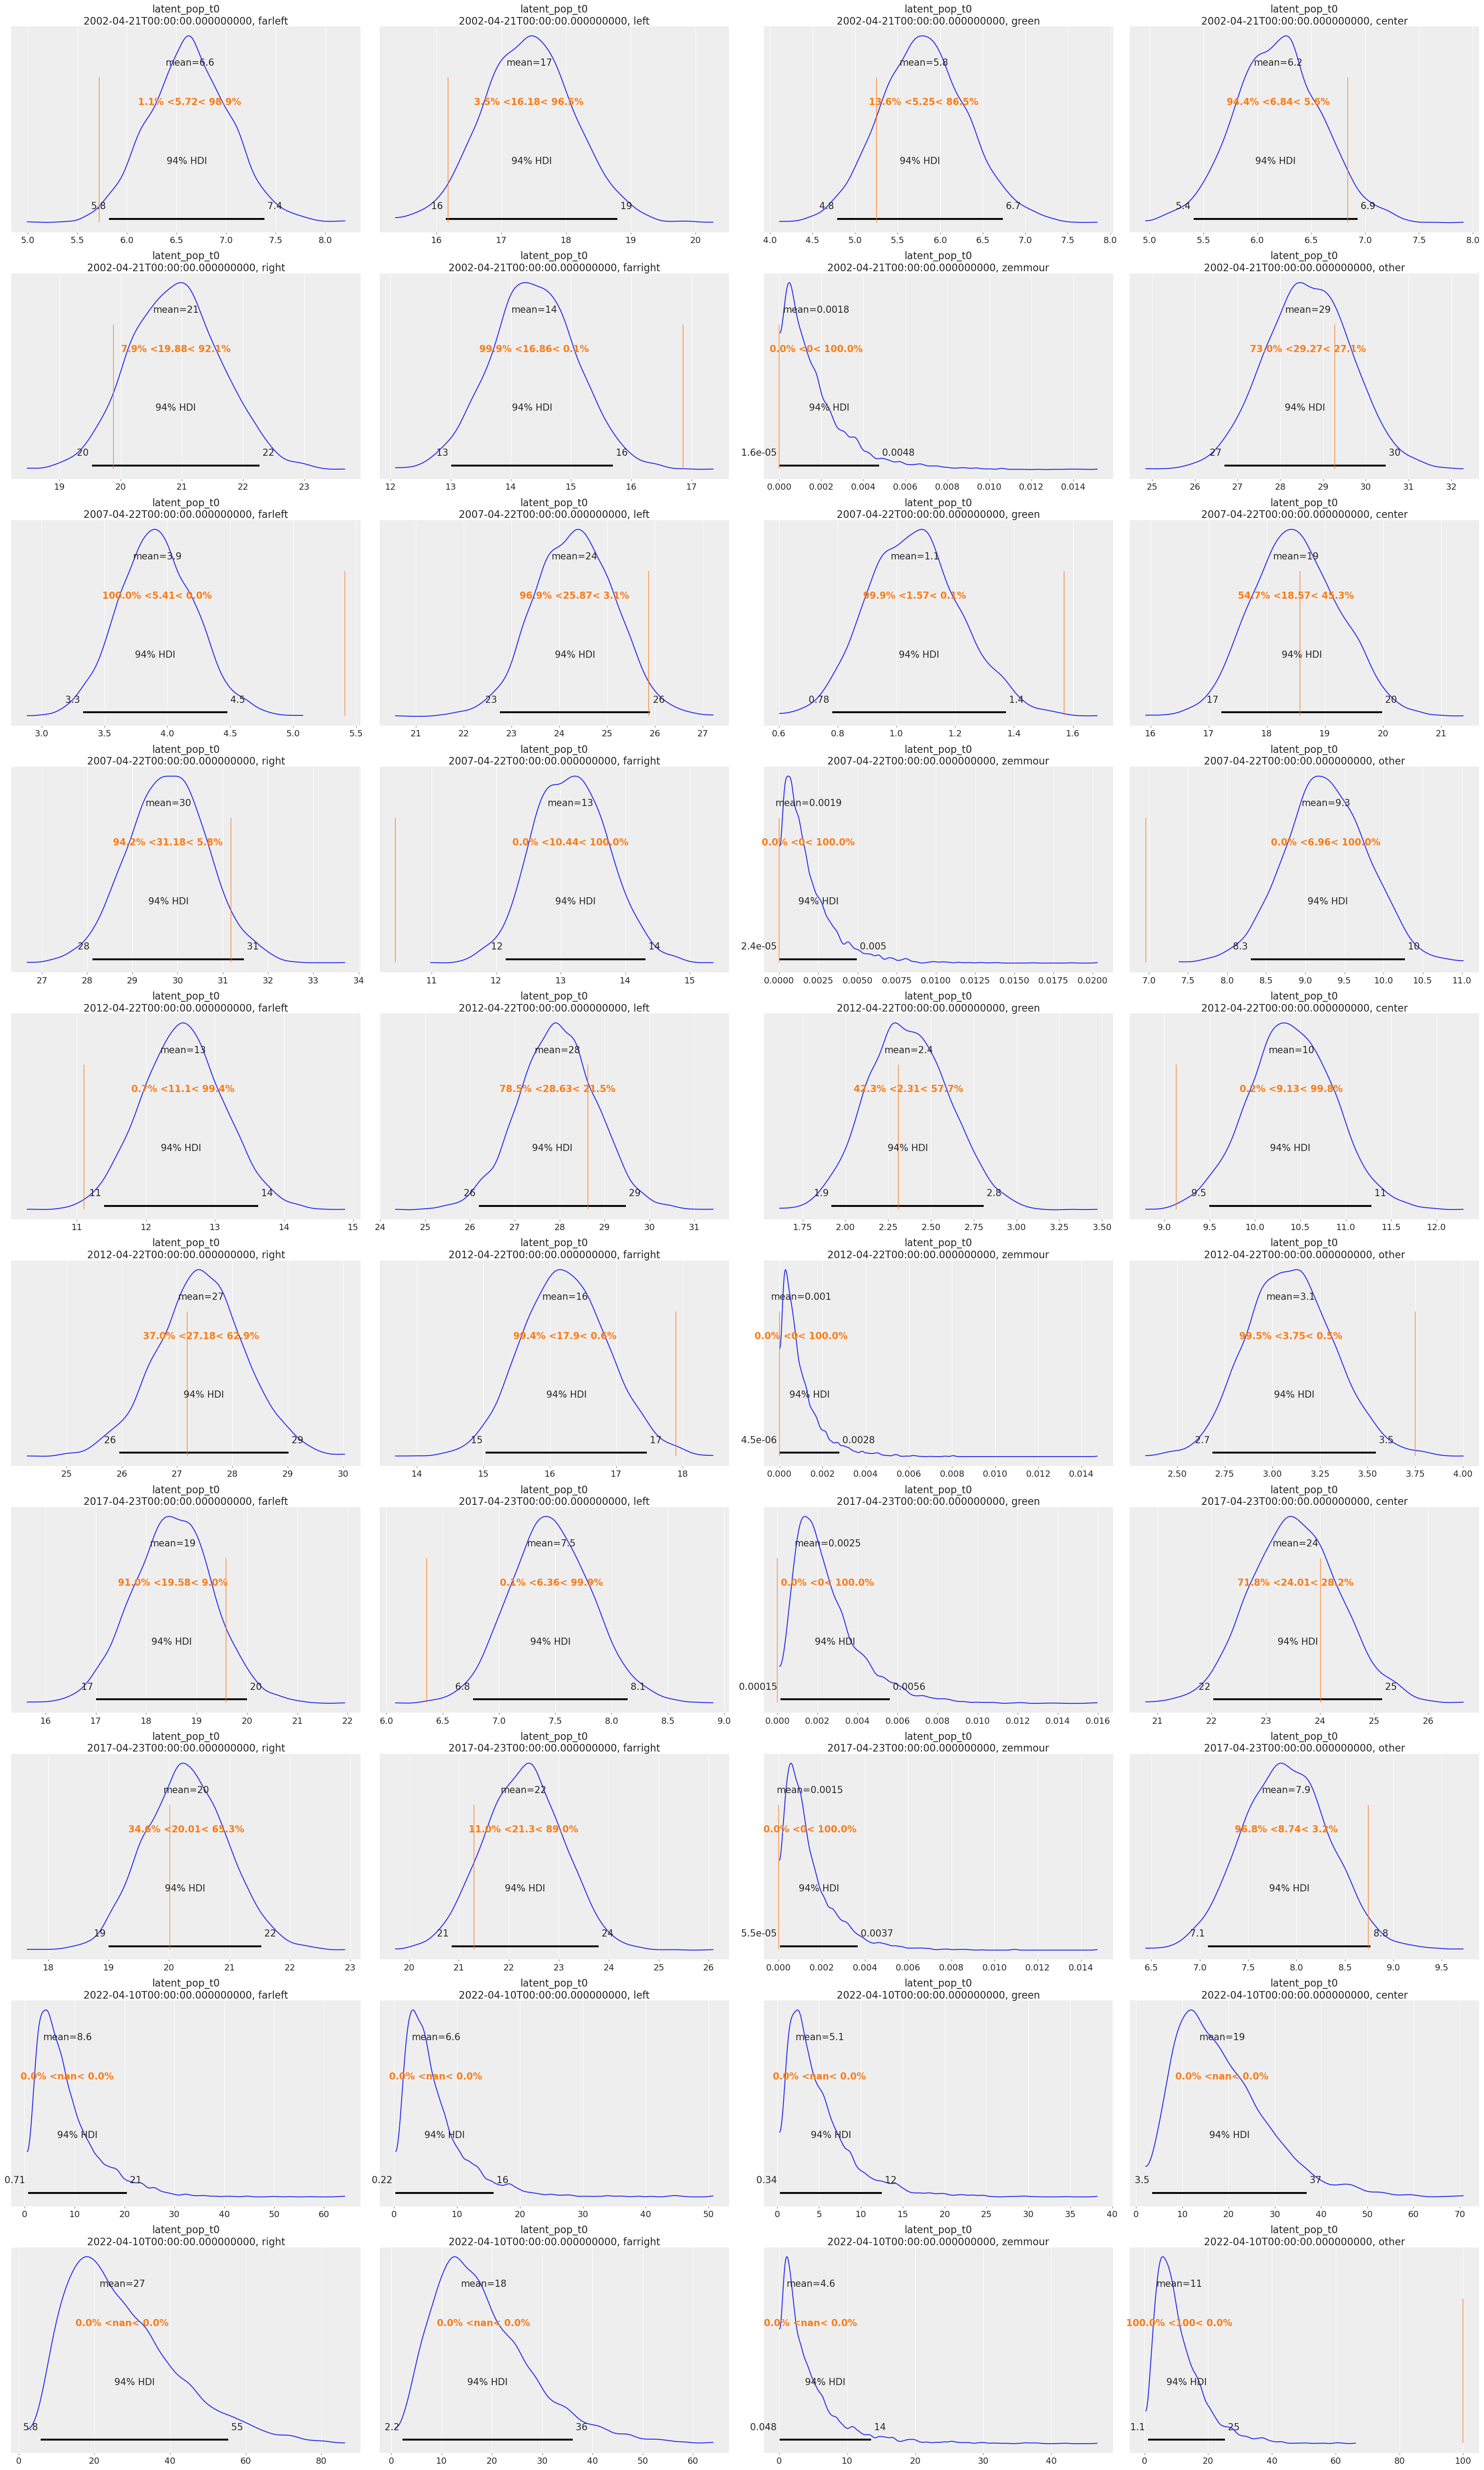

In [18]:
arviz.plot_posterior(
    election_forecast.predictions["latent_pop_t0"] * 100,
    ref_val=results[mb.parties_complete].to_numpy().flatten().tolist(),
);

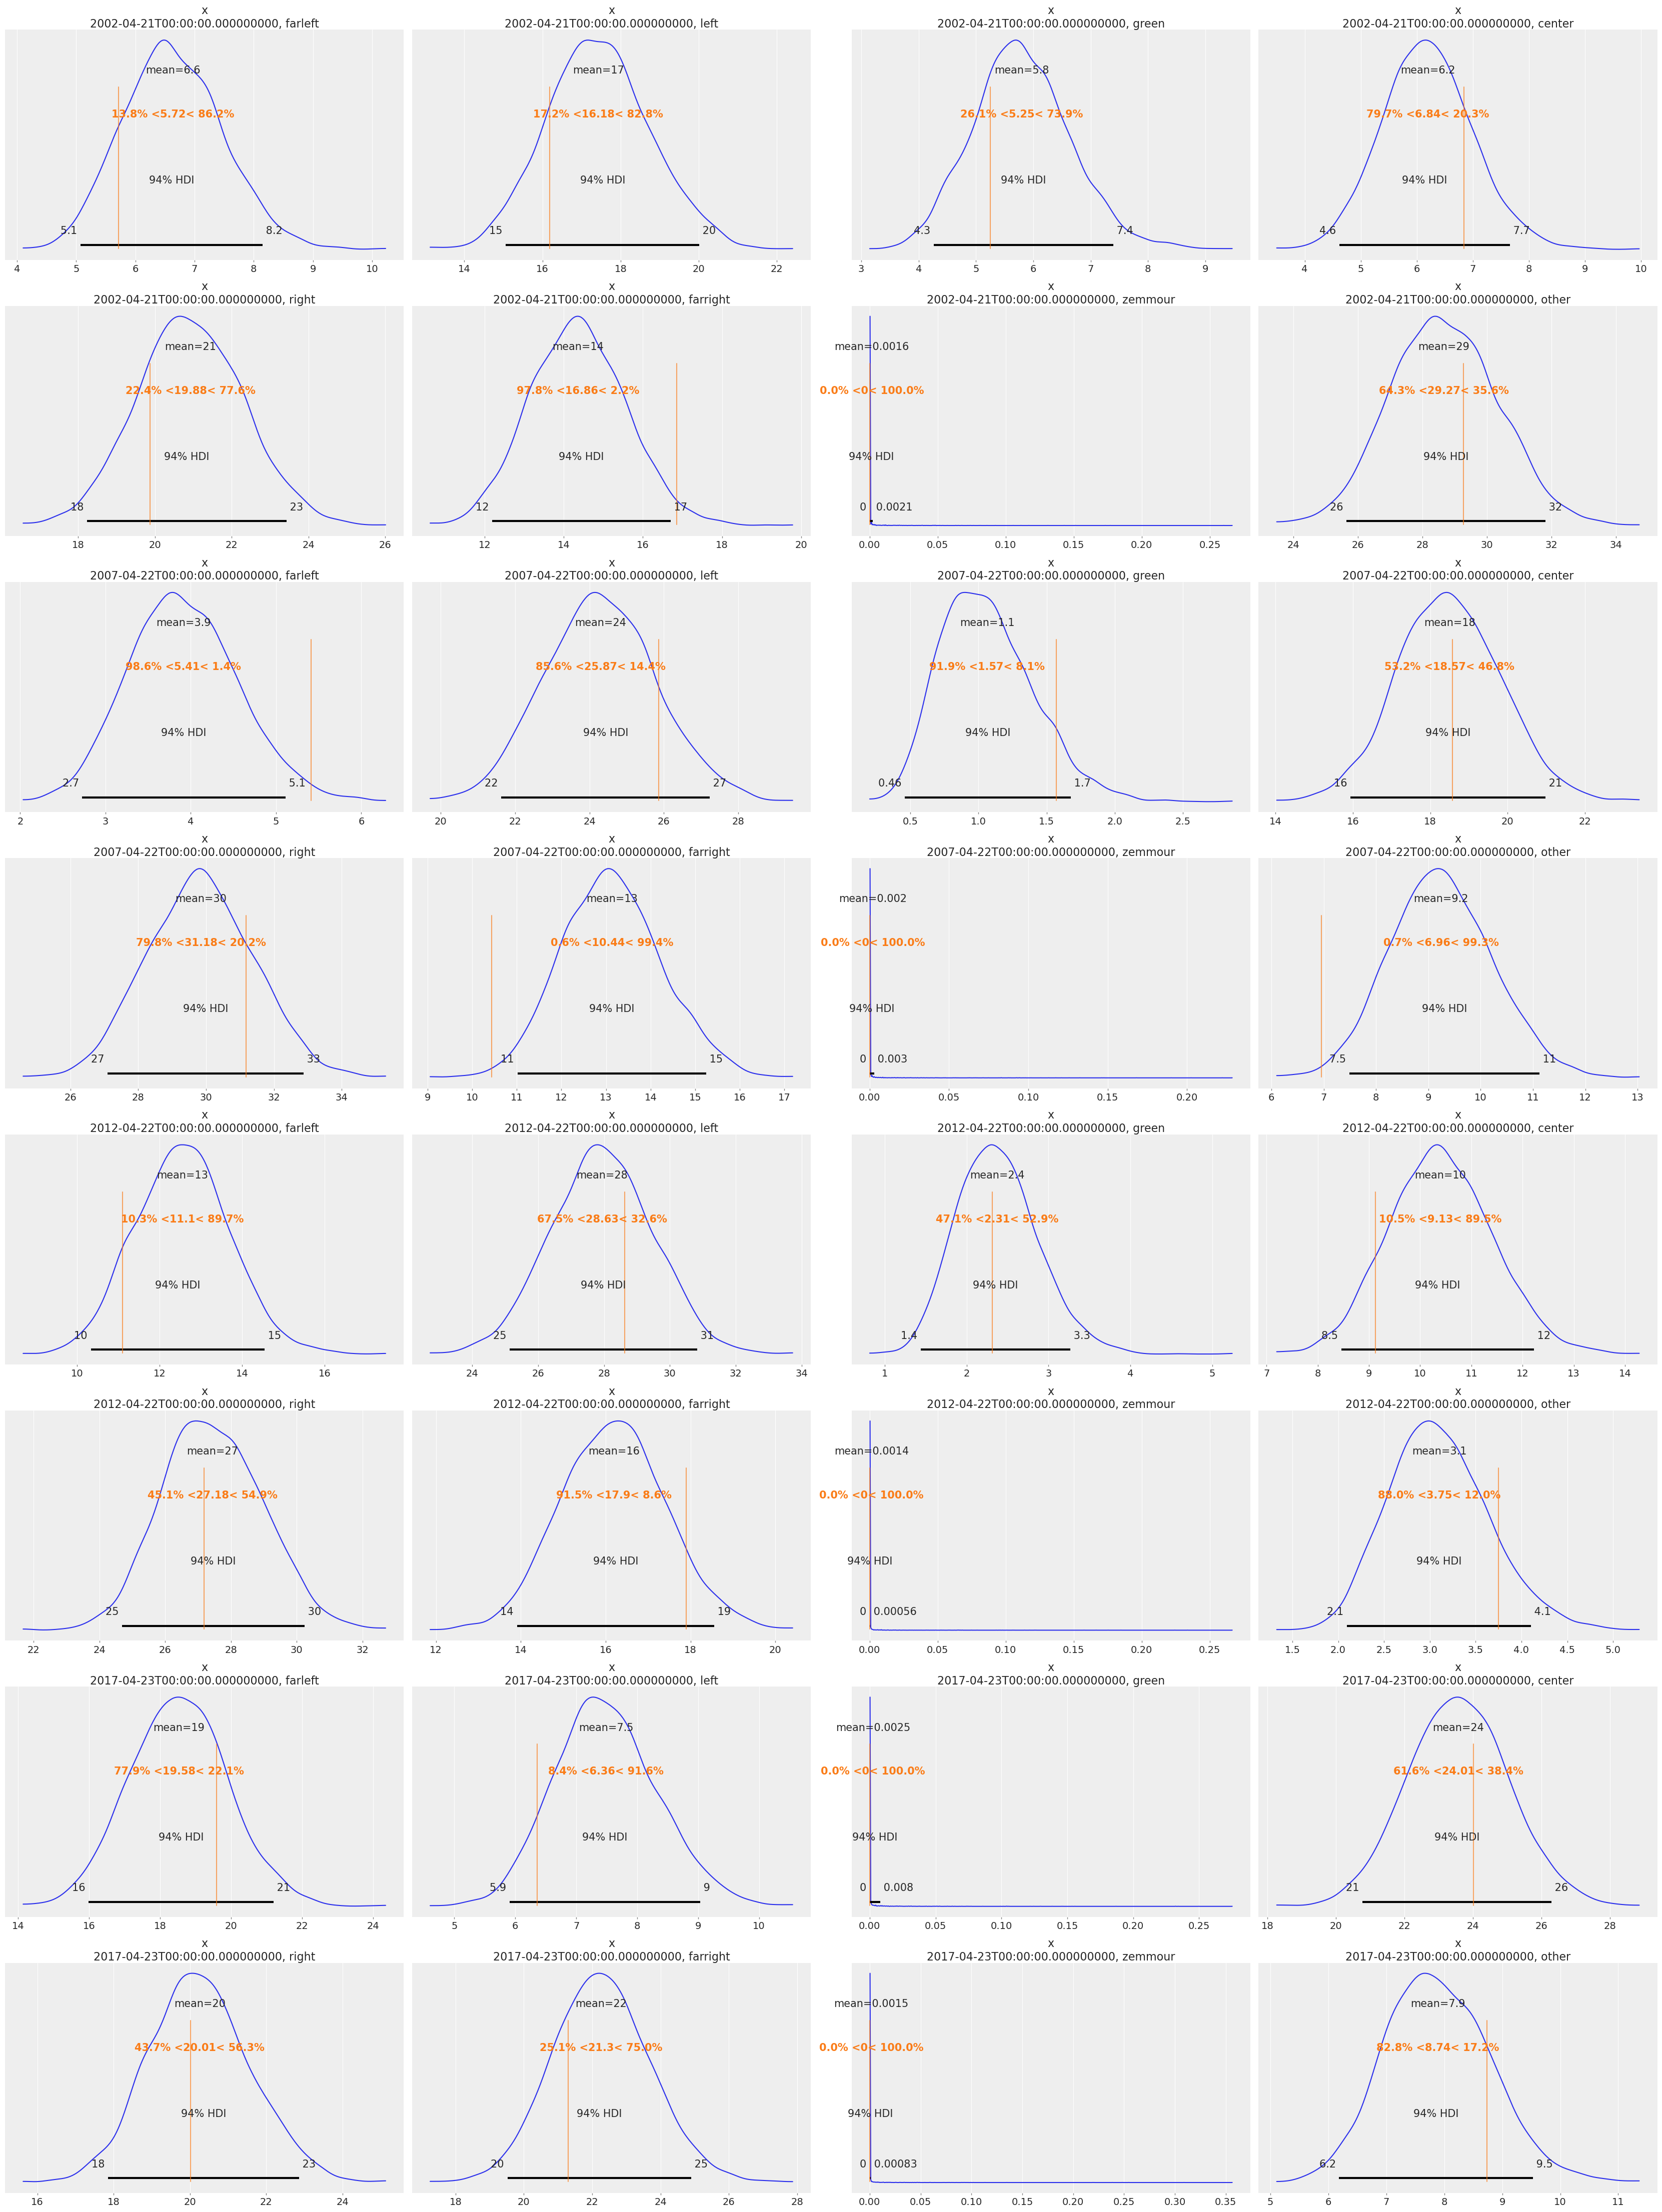

In [22]:
arviz.plot_posterior(
    (
        election_forecast.predictions["R"]
        / election_forecast.predictions_constant_data["results_N"]
    )
    * 100,
    ref_val=results[mb.parties_complete].to_numpy().flatten().tolist(),
);

In [26]:
# force green at 0
# covarying GP (transition matrix)

In [ ]:
# https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm
# add other election types (https://github.com/pollsposition/models/blob/master/district-level/munic_model_prod.ipynb)